In [2]:
import pandas as pd
from datetime import date, datetime

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',100)

In [11]:
df = pd.read_csv(r'/Users/lingchen/team_project-5/data/raw/new_retail_data.csv')
# Select columns I need
df = df[['Transaction_ID','Customer_ID','City', 'State','Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products']]
df.shape

(302010, 25)

Data Cleaning

In [9]:
# Drop null rows
df_cleaned = df.dropna()
df_cleaned.shape

(295617, 25)

In [10]:
# Data type conversions
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%m/%d/%Y')
# Create a new column to store yearmonth as integer
df_cleaned['yearmonth'] = df_cleaned['Date'].dt.strftime('%Y%m').astype(int)

df_cleaned

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,yearmonth
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,2023-09-18,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,202309
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,2023-12-31,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,202312
2,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,2023-04-26,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,202304
3,7232460.0,62101.0,Edmonton,Ontario,Canada,56.0,Male,High,Premium,2023-05-08,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,202305
4,4983775.0,27901.0,Bristol,England,UK,22.0,Male,Low,Premium,2024-01-10,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,202401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Townsville,New South Wales,Australia,31.0,Male,Medium,Regular,2024-01-20,2024.0,January,23:40:29,5.0,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction,202401
302006,1197603.0,69772.0,Hanover,Berlin,Germany,35.0,Female,Low,New,2023-12-28,2023.0,December,2:55:45,1.0,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram,202312
302007,7743242.0,28449.0,Brighton,England,UK,41.0,Male,Low,Premium,2024-02-27,2024.0,February,2:43:49,3.0,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka,202402
302008,9301950.0,45477.0,Halifax,Ontario,Canada,41.0,Male,Medium,New,2023-09-03,2023.0,September,11:20:31,1.0,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand,202309


In [11]:
# Month into date column
df_cleaned['Month_Number'] = pd.to_datetime(df_cleaned['Month'],format='%B').dt.month
# Time into time column

df_cleaned

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,yearmonth,Month_Number
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,2023-09-18,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,202309,9
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,2023-12-31,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,202312,12
2,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,2023-04-26,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,202304,4
3,7232460.0,62101.0,Edmonton,Ontario,Canada,56.0,Male,High,Premium,2023-05-08,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,202305,5
4,4983775.0,27901.0,Bristol,England,UK,22.0,Male,Low,Premium,2024-01-10,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,202401,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Townsville,New South Wales,Australia,31.0,Male,Medium,Regular,2024-01-20,2024.0,January,23:40:29,5.0,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction,202401,1
302006,1197603.0,69772.0,Hanover,Berlin,Germany,35.0,Female,Low,New,2023-12-28,2023.0,December,2:55:45,1.0,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram,202312,12
302007,7743242.0,28449.0,Brighton,England,UK,41.0,Male,Low,Premium,2024-02-27,2024.0,February,2:43:49,3.0,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka,202402,2
302008,9301950.0,45477.0,Halifax,Ontario,Canada,41.0,Male,Medium,New,2023-09-03,2023.0,September,11:20:31,1.0,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand,202309,9


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Load the dataset
retail_data = df_cleaned

# Display the first few rows of the dataset
print(retail_data.head())

# Display basic information about the dataset
print(retail_data.info())

# Select features and target
features = ['City', 'Age', 'Income']
target = 'Total_Amount'
X = retail_data[features]
y = retail_data[target]

   Transaction_ID  Customer_ID        City            State    Country   Age  Gender Income  \
0       8691788.0      37249.0    Dortmund           Berlin    Germany  21.0    Male    Low   
1       2174773.0      69749.0  Nottingham          England         UK  19.0  Female    Low   
2       6679610.0      30192.0     Geelong  New South Wales  Australia  48.0    Male    Low   
3       7232460.0      62101.0    Edmonton          Ontario     Canada  56.0    Male   High   
4       4983775.0      27901.0     Bristol          England         UK  22.0    Male    Low   

  Customer_Segment       Date    Year      Month      Time  Total_Purchases      Amount  \
0          Regular 2023-09-18  2023.0  September  22:03:55              3.0  108.028757   
1          Premium 2023-12-31  2023.0   December   8:42:04              2.0  403.353907   
2          Regular 2023-04-26  2023.0      April   4:06:29              3.0  354.477600   
3          Premium 2023-05-08  2023.0        May  14:55:17       

In [21]:
X

,City,Age,Income
0,Dortmund,21.0,Low
1,Nottingham,19.0,Low
2,Geelong,48.0,Low
3,Edmonton,56.0,High
4,Bristol,22.0,Low
...,...,...,...
302005,Townsville,31.0,Medium
302006,Hanover,35.0,Low
302007,Brighton,41.0,Low
302008,Halifax,41.0,Medium


In [22]:
y

0          324.086270
1          806.707815
2         1063.432799
3         2466.854021
4          248.553049
             ...     
302005     973.962984
302006     285.137301
302007     182.105285
302008     120.834784
302009    2382.233417
Name: Total_Amount, Length: 295617, dtype: float64

In [33]:
# Preprocess the features
# OneHotEncode 'city' and scale 'age' and 'income'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['City', 'Income'])
    ])


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Fit and transform the training data, and transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [39]:
# Convert the sparse matrix to dense
X_train = X_train.toarray()
X_test = X_test.toarray()

In [40]:
# Build the regression model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Output layer for regression
])

In [41]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [42]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
6652/6652 - 9s - loss: 1499150.2500 - val_loss: 1309140.8750 - 9s/epoch - 1ms/step
Epoch 2/30
6652/6652 - 10s - loss: 1408788.2500 - val_loss: 1308234.1250 - 10s/epoch - 2ms/step
Epoch 3/30
6652/6652 - 9s - loss: 1406246.8750 - val_loss: 1316824.5000 - 9s/epoch - 1ms/step
Epoch 4/30
6652/6652 - 9s - loss: 1406328.2500 - val_loss: 1302603.1250 - 9s/epoch - 1ms/step
Epoch 5/30
6652/6652 - 8s - loss: 1404066.1250 - val_loss: 1307405.0000 - 8s/epoch - 1ms/step
Epoch 6/30
6652/6652 - 8s - loss: 1401685.6250 - val_loss: 1307852.8750 - 8s/epoch - 1ms/step
Epoch 7/30
6652/6652 - 9s - loss: 1402691.3750 - val_loss: 1303517.0000 - 9s/epoch - 1ms/step
Epoch 8/30
6652/6652 - 10s - loss: 1402804.1250 - val_loss: 1312611.1250 - 10s/epoch - 1ms/step
Epoch 9/30
6652/6652 - 10s - loss: 1402254.5000 - val_loss: 1306682.0000 - 10s/epoch - 1ms/step
Epoch 10/30
6652/6652 - 9s - loss: 1401921.0000 - val_loss: 1303273.5000 - 9s/epoch - 1ms/step
Epoch 11/30
6652/6652 - 11s - loss: 1401074.0000 - va

In [43]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Mean Squared Error: {loss:.2f}')

1848/1848 [==============================] - 2s 1ms/step - loss: 1279445.0000
Test Mean Squared Error: 1279445.00


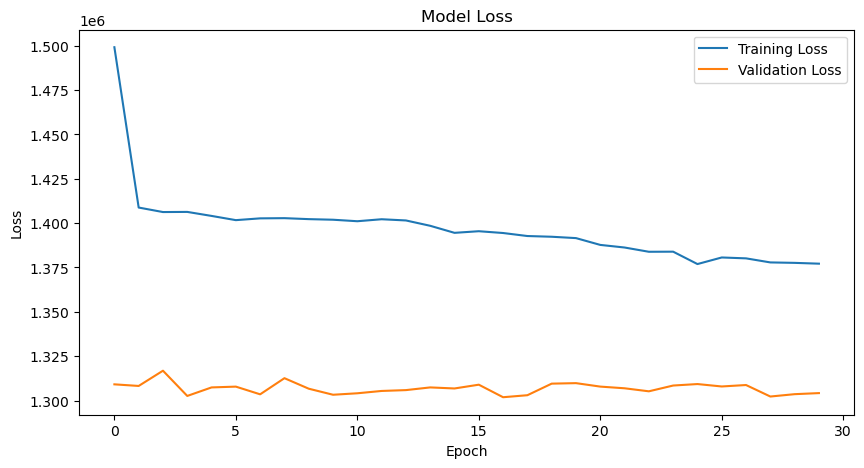

In [44]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

1848/1848 [==============================] - 2s 1ms/step


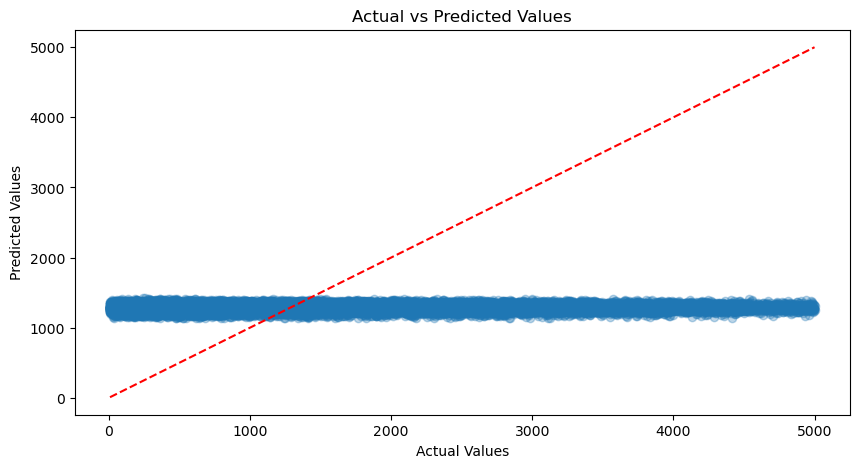

In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot predicted vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()